In [11]:
from tqdm import tqdm_notebook
from IPython.display import Image 


# learning_rate 에 따른 학습

- Case1 : learning_rate = 0.1
- Case2 : learning_rate = 1.5
- Case3 : learning_rate = 1e-5

### case1: learning_rate = 0.1

In [3]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

learning_rate = 0.1

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy   = tf.reduce_mean(tf.cast(is_correct, tf.float32))

W0911 15:39:21.942203  9812 deprecation.py:323] From <ipython-input-3-5ec3f4625285>:32: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


In [4]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(201)):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))

    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 5.732029914855957 
 Weight : 
[[ 0.7288166   0.7153621  -1.1801533 ]
 [-0.57753736 -0.12988332  1.6072978 ]
 [ 0.48373488 -0.51433605 -2.02127   ]]

 Step : 20 
 Cost : 1.6610023975372314 
 Weight : 
[[ 0.35837555  0.7006911  -0.79504126]
 [-0.5218104  -0.14752226  1.5692096 ]
 [-0.00524238 -0.21694626 -1.8296826 ]]

 Step : 40 
 Cost : 1.4070580005645752 
 Weight : 
[[ 0.08632907  0.6441535  -0.4664571 ]
 [-0.2783146  -0.19541715  1.3736086 ]
 [-0.14105877 -0.16434805 -1.7464645 ]]

 Step : 60 
 Cost : 1.2188069820404053 
 Weight : 
[[-0.14574493  0.58043295 -0.17066272]
 [-0.11075758 -0.17286885  1.1835033 ]
 [-0.22450294 -0.17601475 -1.6513535 ]]

 Step : 80 
 Cost : 1.0710084438323975 
 Weight : 
[[-0.3455095   0.51687723  0.0926576 ]
 [ 0.01382125 -0.11677328  1.002829  ]
 [-0.28096503 -0.21812563 -1.5527805 ]]

 Step : 100 
 Cost : 0.9537602663040161 
 Weight : 
[[-0.52009284  0.45806158  0.32605675]
 [ 0.11236366 -0.04872473  0.83623797]
 [-0.32143888 -0.2711

### case2: learning_rate = 1.5

In [5]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

learning_rate = 1.5

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [6]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0 or step<5:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))
    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 4.536120414733887 
 Weight : 
[[-1.9139316   1.1026288   1.794597  ]
 [-1.9765708   3.0702066   0.4536147 ]
 [-4.1118226   1.2449874   0.32312405]]

 Step : 1 
 Cost : 22.07525634765625 
 Weight : 
[[-1.5389316   0.16525811  2.3569677 ]
 [ 0.46092916 -0.8670306   1.953352  ]
 [-1.6743226  -2.5048656   1.6354772 ]]

 Step : 2 
 Cost : 22.286516189575195 
 Weight : 
[[-1.1639359   0.72775644  1.4194736 ]
 [ 2.8984206   1.757966   -3.1091356 ]
 [ 0.7631731   0.30763245 -3.6145167 ]]

 Step : 3 
 Cost : 11.074285507202148 
 Weight : 
[[-2.0958228  1.0971434  1.9819736]
 [-0.7793081  3.935695  -1.6091357]
 [-2.9448993  2.7032046 -2.3020167]]

 Step : 4 
 Cost : 28.454124450683594 
 Weight : 
[[-1.7208228e+00  1.5964341e-01  2.5444736e+00]
 [ 1.6581919e+00 -1.8050671e-03 -1.0913575e-01]
 [-5.0739932e-01 -1.0467954e+00 -9.8951674e-01]]

 Step : 20 
 Cost : nan 
 Weight : 
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]

 Step : 40 
 Cost : nan 
 Weight : 
[[nan nan nan]
 [na

### case 3: learning_rate = 1e -5

In [7]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

learning_rate = 1e-5

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [8]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))

    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 3.1290576457977295 
 Weight : 
[[-1.3092784   0.9677886   1.614925  ]
 [ 0.30826908  0.32995102 -0.39388904]
 [ 0.96012723  1.6256702  -0.1544437 ]]

 Step : 20 
 Cost : 3.125328540802002 
 Weight : 
[[-1.3092378   0.9676765   1.6149966 ]
 [ 0.3085638   0.32946226 -0.39369473]
 [ 0.96042883  1.6251981  -0.15427174]]

 Step : 40 
 Cost : 3.1216015815734863 
 Weight : 
[[-1.3091987   0.96756446  1.6150681 ]
 [ 0.30885825  0.3289735  -0.39350042]
 [ 0.96073043  1.624726   -0.15409978]]

 Step : 60 
 Cost : 3.1178762912750244 
 Weight : 
[[-1.3091606   0.9674524   1.6151396 ]
 [ 0.3091527   0.32848474 -0.3933061 ]
 [ 0.9610315   1.624254   -0.15392782]]

 Step : 80 
 Cost : 3.1141552925109863 
 Weight : 
[[-1.3091224   0.96734154  1.6152111 ]
 [ 0.30944714  0.32799646 -0.3931118 ]
 [ 0.9613319   1.6237819  -0.15375586]]

 Step : 100 
 Cost : 3.110436201095581 
 Weight : 
[[-1.3090843   0.9672307   1.6152827 ]
 [ 0.30974135  0.3275083  -0.39291748]
 [ 0.9616323   1.62330

# Non_normalized inputs

### Non-normalized inputs
> Linear regression without min, max
- 너무나 심플하고 멋진 모델임에도 불구하고 학습해보면 NaN 이 발생
- 해결방안 : Nomalized 한다거나, MinMaxScaler 함수 사용

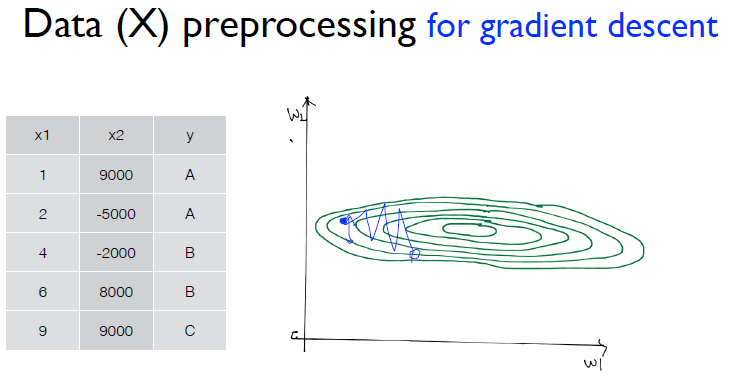

In [14]:
Image('./images/2.png')

- 데이터값의 차이가 너무 큰 경우-> 정규화 사는 것.

In [15]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])
# print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(" x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

 x_data : 
[[8.28659973e+02 8.33450012e+02 9.08100000e+05 8.28349976e+02]
 [8.23020020e+02 8.28070007e+02 1.82810000e+06 8.21655029e+02]
 [8.19929993e+02 8.24400024e+02 1.43810000e+06 8.18979980e+02]
 [8.16000000e+02 8.20958984e+02 1.00810000e+06 8.15489990e+02]
 [8.19359985e+02 8.23000000e+02 1.18810000e+06 8.18469971e+02]
 [8.19000000e+02 8.23000000e+02 1.19810000e+06 8.16000000e+02]
 [8.11700012e+02 8.15250000e+02 1.09810000e+06 8.09780029e+02]
 [8.09510010e+02 8.16659973e+02 1.39810000e+06 8.04539978e+02]]  

 y_data : 
[[831.659973]
 [828.070007]
 [824.159973]
 [819.23999 ]
 [818.97998 ]
 [820.450012]
 [813.669983]
 [809.559998]]


In [16]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print("Step : {}, \t Cost : {}".format(step, cost_val))
    # print("\n step : {}, \n Cost : {} \n Prediction : {}".format(step, cost_val, hy_val))

Step : 0, 	 Cost : 164811898880.0
Step : 1, 	 Cost : 1.8107558256403032e+26
Step : 2, 	 Cost : inf
Step : 3, 	 Cost : inf
Step : 4, 	 Cost : inf
Step : 5, 	 Cost : inf
Step : 6, 	 Cost : nan
Step : 7, 	 Cost : nan
Step : 8, 	 Cost : nan
Step : 9, 	 Cost : nan
Step : 10, 	 Cost : nan
Step : 11, 	 Cost : nan
Step : 12, 	 Cost : nan
Step : 13, 	 Cost : nan
Step : 14, 	 Cost : nan
Step : 15, 	 Cost : nan
Step : 16, 	 Cost : nan
Step : 17, 	 Cost : nan
Step : 18, 	 Cost : nan
Step : 19, 	 Cost : nan
Step : 20, 	 Cost : nan
Step : 21, 	 Cost : nan
Step : 22, 	 Cost : nan
Step : 23, 	 Cost : nan
Step : 24, 	 Cost : nan
Step : 25, 	 Cost : nan
Step : 26, 	 Cost : nan
Step : 27, 	 Cost : nan
Step : 28, 	 Cost : nan
Step : 29, 	 Cost : nan
Step : 30, 	 Cost : nan
Step : 31, 	 Cost : nan
Step : 32, 	 Cost : nan
Step : 33, 	 Cost : nan
Step : 34, 	 Cost : nan
Step : 35, 	 Cost : nan
Step : 36, 	 Cost : nan
Step : 37, 	 Cost : nan
Step : 38, 	 Cost : nan
Step : 39, 	 Cost : nan
Step : 40, 	 Cost : 

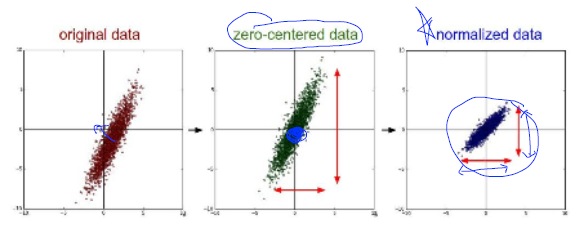

In [18]:
Image('./images/3.png')

In [19]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    print(" max.data :\n {max}, \n\n min.data :\n {min}, \n\n numerator :\n {numerator}, \n\n denominator :\n {denominator} \n".format(
            max = np.max(data, 0), 
            min = np.min(data, 0),
            numerator = numerator,
            denominator = denominator
        ))

    # noise term prevents the zero division
    return numerator / (denominator + 1e-5)


xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])

# print("np.max(xy, 0) :", np.max(xy, 0))
# print("np.min(xy, 0) :", np.min(xy, 0))

# very important. It does not work without it.
xy = MinMaxScaler(xy)
print(" xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) \n", xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print("\n x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

 max.data :
 [8.28659973e+02 8.33450012e+02 1.82810000e+06 8.28349976e+02
 8.31659973e+02], 

 min.data :
 [8.09510010e+02 8.15250000e+02 9.08100000e+05 8.04539978e+02
 8.09559998e+02], 

 numerator :
 [[1.9149963e+01 1.8200012e+01 0.0000000e+00 2.3809998e+01 2.2099975e+01]
 [1.3510010e+01 1.2820007e+01 9.2000000e+05 1.7115051e+01 1.8510009e+01]
 [1.0419983e+01 9.1500240e+00 5.3000000e+05 1.4440002e+01 1.4599975e+01]
 [6.4899900e+00 5.7089840e+00 1.0000000e+05 1.0950012e+01 9.6799920e+00]
 [9.8499750e+00 7.7500000e+00 2.8000000e+05 1.3929993e+01 9.4199820e+00]
 [9.4899900e+00 7.7500000e+00 2.9000000e+05 1.1460022e+01 1.0890014e+01]
 [2.1900020e+00 0.0000000e+00 1.9000000e+05 5.2400510e+00 4.1099850e+00]
 [0.0000000e+00 1.4099730e+00 4.9000000e+05 0.0000000e+00 0.0000000e+00]], 

 denominator :
 [1.9149963e+01 1.8200012e+01 9.2000000e+05 2.3809998e+01 2.2099975e+01] 

 xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) 
 [[0.99999948 0.99999945 0.         0.99999958 0.99999955]
 [